In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
import pprint
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN

def plot_clustering(X, plt_labels, features=(0,1), ax=plt):
    if features[0] == features[1]:
        ax.hist(
            X[:, features[0]],
            edgecolor='black'
        )
    else:
        ax.scatter(
            X[:,features[0]],
            X[:,features[1]],
            c=plt_labels,
            edgecolor='black'
        )

In [2]:
X1 = np.random.rand(5000, 2)  * np.array([2, 500])
X2 = np.random.rand(5000, 2)  * np.array([2,500]) + np.array([3, 0])

X = np.concatenate((X1, X2))

X_min = X.min(0)
X_max = X.max(0)


X_normalized = (X - X_min) / (X_max - X_min)
X_standarized = (X - X.mean(0)) / X.std(0)


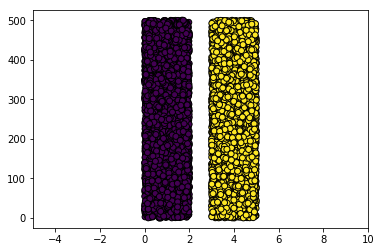

In [3]:
labels = np.concatenate(
    (
        np.zeros(X1.shape[0]),
        np.ones(X2.shape[0])
    )
)
plt.xlim((-5, 10))
plot_clustering(X, labels)

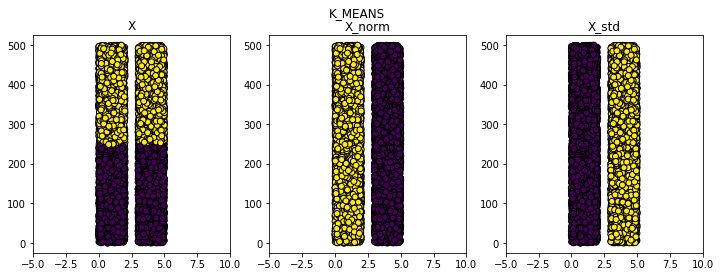

In [4]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(12,4)
fig.suptitle('K_MEANS')
for i, data in enumerate([X, X_normalized, X_standarized ]):
    model = KMeans(n_clusters=2)
    model.fit(data)
    plot_clustering(X, model.labels_, ax=axes[i])
    axes[i].set_title(['X', 'X_norm','X_std'][i])
    axes[i].set_xlim((-5, 10))

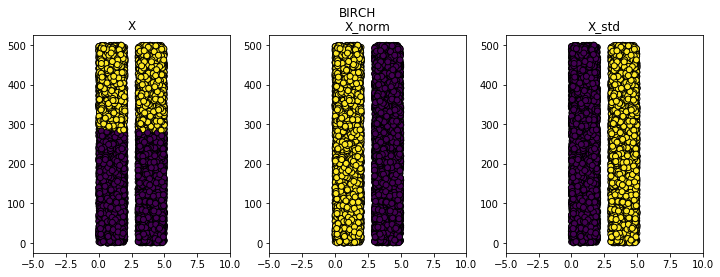

In [5]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(12,4)
fig.suptitle('BIRCH')
for i, data in enumerate([X, X_normalized, X_standarized ]):
    birch = Birch(n_clusters=2, threshold=0.2)
    birch.fit(data)
    plot_clustering(X, birch.labels_, ax=axes[i])
    axes[i].set_title(['X', 'X_norm','X_std'][i])
    axes[i].set_xlim((-5, 10))

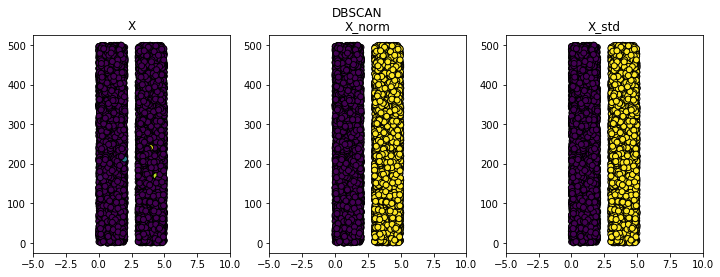

In [6]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(12,4)
fig.suptitle('DBSCAN')
for i, data in enumerate([X, X_normalized, X_standarized ]):
    model = DBSCAN(eps=0.2)
    model.fit(data)
    plot_clustering(X, model.labels_, ax=axes[i])
    axes[i].set_title(['X', 'X_norm','X_std'][i])
    axes[i].set_xlim((-5, 10))